# Step 1: Installing Required Libraries in Jupyter Notebook

In [2]:
# Install TensorFlow
!pip install tensorflow

# Install Keras 
!pip install keras

# Install NumPy
!pip install numpy

# Install Pandas
!pip install pandas

# Install Matplotlib
!pip install matplotlib

# Step 2: Data Collection and Preprocessing

## Data collection & Preprocessing

In [3]:
# Load the dataset using UTF-8 encoding
with open("Romeo-Juliet.txt", "r", encoding="utf-8") as file:
    data = file.read()


## Tokenization:

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the data
tokenizer = Tokenizer(char_level=False, filters='')  # Set char_level=True for character level tokenization
tokenizer.fit_on_texts([data])

# Convert text to sequence of tokens
sequence_data = tokenizer.texts_to_sequences([data])[0]


## Create Input and Target Sequences:

### For training, we'll need input sequences and their corresponding target sequences (the next word in the sequence).

In [5]:
# Create input and target sequences
input_sequences = []
for i in range(1, len(sequence_data)):
    sequence = sequence_data[i-1:i+1]
    input_sequences.append(sequence)

import numpy as np

# Split sequences into inputs and targets
input_sequences = np.array(input_sequences)
X, y = input_sequences[:, 0], input_sequences[:, 1]


## One-Hot Encoding:

### Language models often use one-hot encoding for their target labels.

In [6]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the output
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)


## Step 3: Building the Language Model using LSTM

In [7]:
# Import necessary modules:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Define the model architecture:

In [9]:
# Define the model
model = Sequential()

# Add the embedding layer
# The embedding layer turns positive integers (indexes) into dense vectors of fixed size.
# len(tokenizer.word_index) + 1 gives us the total number of words. 
# We can choose the size of the embedding, here it's set to 50, but you can increase or decrease based on your requirements.
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=1))

# Add an LSTM layer with 100 units/memory cells
model.add(LSTM(100, return_sequences=False))  # 'return_sequences' is False here because we're connecting this LSTM layer to a dense layer

# Add a dense layer with as many neurons as words, for each word's probability
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 50)             407000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 8140)              822140    
                                                                 
Total params: 1,289,540
Trainable params: 1,289,540
Non-trainable params: 0
_________________________________________________________________


###  Training the Model:

In [10]:
# Train the model
history = model.fit(X, y, epochs=100, verbose=1, batch_size=32, validation_split=0.2)


Epoch 1/100
620/620 [==============================] - 10s 13ms/step - loss: 7.9530 - accuracy: 0.0270 - val_loss: 7.9418 - val_accuracy: 0.0436
Epoch 2/100
620/620 [==============================] - 7s 12ms/step - loss: 7.1350 - accuracy: 0.0275 - val_loss: 8.2773 - val_accuracy: 0.0434
Epoch 3/100
620/620 [==============================] - 8s 12ms/step - loss: 6.9401 - accuracy: 0.0294 - val_loss: 8.5987 - val_accuracy: 0.0484
Epoch 4/100
620/620 [==============================] - 8s 12ms/step - loss: 6.7713 - accuracy: 0.0401 - val_loss: 8.9159 - val_accuracy: 0.0519
Epoch 5/100
620/620 [==============================] - 7s 11ms/step - loss: 6.5884 - accuracy: 0.0472 - val_loss: 9.2031 - val_accuracy: 0.0502
Epoch 6/100
620/620 [==============================] - 7s 12ms/step - loss: 6.4087 - accuracy: 0.0535 - val_loss: 9.4059 - val_accuracy: 0.0515
Epoch 7/100
620/620 [==============================] - 7s 12ms/step - loss: 6.2219 - accuracy: 0.0677 - val_loss: 9.4806 - val_accuracy

620/620 [==============================] - 7s 12ms/step - loss: 2.6869 - accuracy: 0.3570 - val_loss: 14.5260 - val_accuracy: 0.0583
Epoch 58/100
620/620 [==============================] - 7s 11ms/step - loss: 2.6850 - accuracy: 0.3578 - val_loss: 14.5025 - val_accuracy: 0.0591
Epoch 59/100
620/620 [==============================] - 7s 11ms/step - loss: 2.6815 - accuracy: 0.3590 - val_loss: 14.5442 - val_accuracy: 0.0589
Epoch 60/100
620/620 [==============================] - 7s 11ms/step - loss: 2.6803 - accuracy: 0.3604 - val_loss: 14.6113 - val_accuracy: 0.0593
Epoch 61/100
620/620 [==============================] - 7s 11ms/step - loss: 2.6776 - accuracy: 0.3599 - val_loss: 14.5323 - val_accuracy: 0.0623
Epoch 62/100
620/620 [==============================] - 7s 12ms/step - loss: 2.6750 - accuracy: 0.3572 - val_loss: 14.5379 - val_accuracy: 0.0567
Epoch 63/100
620/620 [==============================] - 8s 13ms/step - loss: 2.6731 - accuracy: 0.3609 - val_loss: 14.6422 - val_accuracy

In [14]:
model.save('custom_llm_model.h5')

## Visualize Training History:

### Visualizing the training and validation loss (and accuracy, if applicable) can give insights into the behavior of the model over epochs.

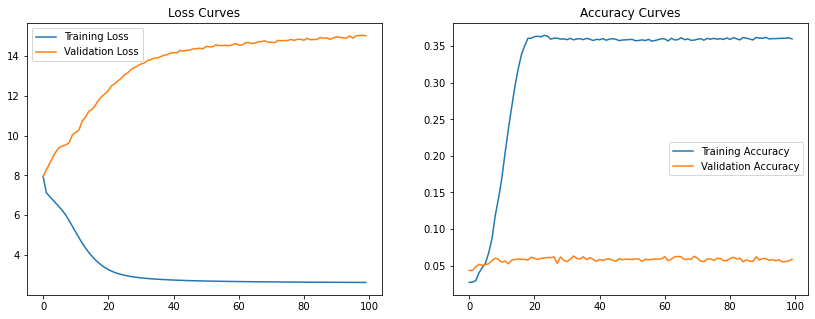

In [11]:
import matplotlib.pyplot as plt

# Plotting the loss and accuracy curves
plt.figure(figsize=(14, 5))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')

# Accuracy Curves (if accuracy is being monitored)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


# Step 5: Generating Text

### Define the sampling function:

Here's a sample function that takes the model's predictions (a probability distribution over words or characters) and a temperature. The temperature modifies the probability distribution before sampling, allowing for more random or more deterministic predictions.

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your model and tokenizer are loaded:
model = tf.keras.models.load_model('custom_llm_model.h5')

# Your provided sampling function
def sample(preds, temperature=0.5):
    preds = np.asarray(preds[0]).astype('float64')
    preds = np.log(preds + 1e-10) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


## Generate text with sampling:

Now, let's create a function to generate text sequences using the trained model and the sampling function:

In [19]:

# Modified text generation function
def chatbot_response(seed_text, num_words=50, max_sequence_len=50, temperature=1.0):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = sample(predicted_probs, temperature=temperature)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [21]:
# Interact with the chatbot:
while True:
    user_input = input("You: ")
    if user_input.lower() in ["quit","exit", "bye"]:
        break
    response = chatbot_response(user_input)
    print("Bot:", response)

You: romeo
Bot: romeo and to you you have to no patience.
your you think you be fourteen;
that shall be thee.

 such a light a poison of demesnes, youthful, and he is a come?

servant.
up.

romeo.
whither to me to the servants.

first servant.
where’s potpan, that that thou didst love the you love in thy sighs;
but all but a
You: juliet
Bot: juliet and i and i you do you have not this not so the prayers shall be shall i come shall i say you love not the watch do you go be you their poison to go you liv’d at my many i will be a fine
that you a gladly were
You: quit
